# IMPORTING ALL THE NECESARY LIBRARIES

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# SETTING UP THE DATASET PATHS AND DIRECTORIES

In [4]:
train_dir = "Training"
test_dir = "Testing"

categories = ["glioma", "meningioma", "notumor", "pituitary"]

# Loading the data

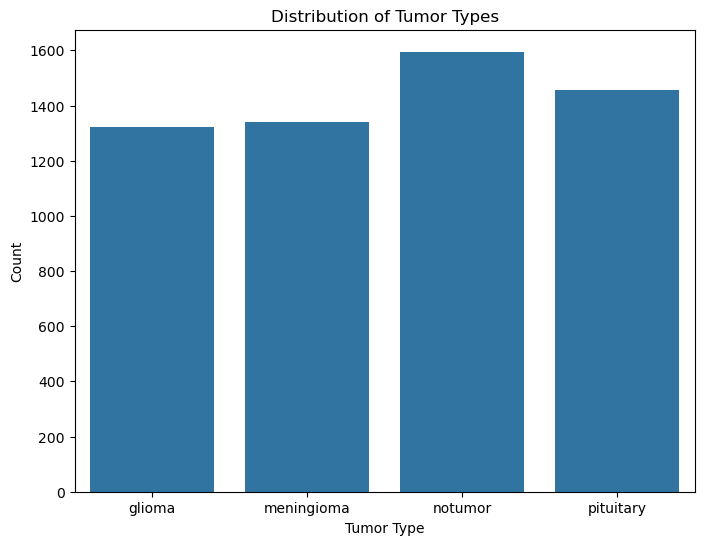

In [6]:
train_data = []
for category in categories:
    folder_path = os.path.join(train_dir, category)
    images = os.listdir(folder_path)
    count = len(images)
    train_data.append(pd.DataFrame({"Image": images, "Category": [category] * count, "Count": [count] * count}))

train_df = pd.concat(train_data, ignore_index=True)

# Visualize the distribution of tumor types in the training dataset
plt.figure(figsize=(8, 6))
sns.barplot(data=train_df, x="Category", y="Count")
plt.title("Distribution of Tumor Types")
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.show()

# Visualization

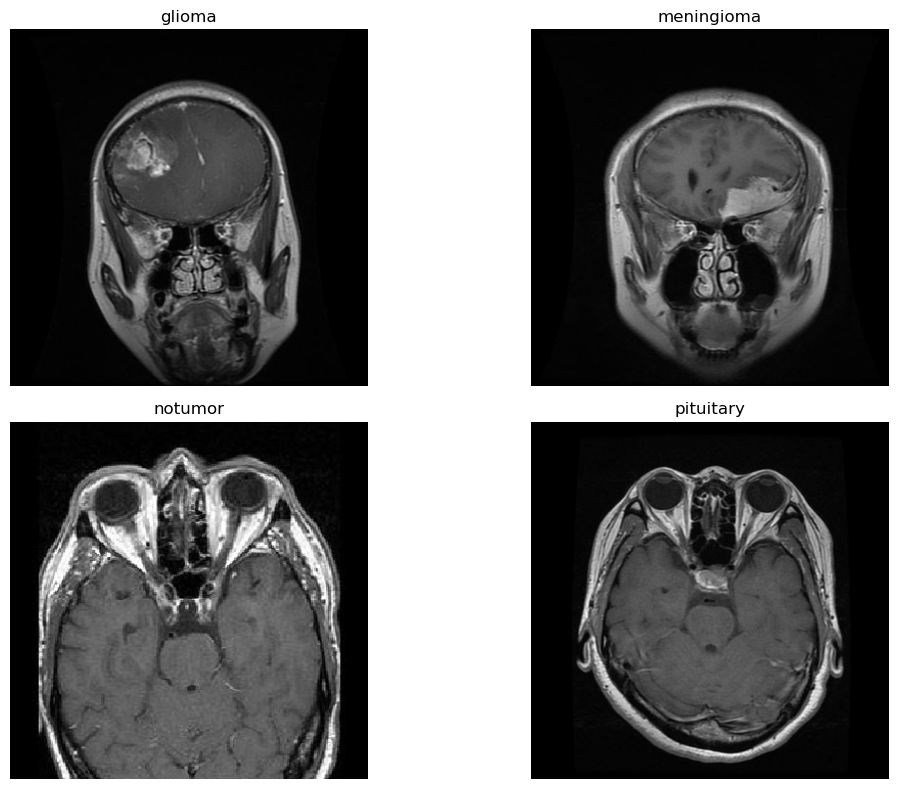

In [8]:
plt.figure(figsize=(12, 8))
for i, category in enumerate(categories):
    folder_path = os.path.join(train_dir, category)
    image_path = os.path.join(folder_path, os.listdir(folder_path)[0])
    img = plt.imread(image_path)
    plt.subplot(2, 2, i+1)
    plt.imshow(img)
    plt.title(category)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [9]:
image_size = (150, 150)

# Set the batch size for training
batch_size = 32

# Set the number of epochs for training
epochs = 60

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False

)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


# Model

In [12]:
model = Sequential([
    Input(shape=(image_size[0], image_size[1], 3)),  # Define input shape explicitly
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),
    Dense(len(categories), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [19]:
history = model.fit(
    train_generator,
    steps_per_epoch=None,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=None
)

Epoch 1/60


C:\Users\rahul\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 59s 311ms/step - accuracy: 0.4486 - loss: 1.1498 - val_accuracy: 0.5622 - val_loss: 1.1345
Epoch 2/60
179/179 ━━━━━━━━━━━━━━━━━━━━ 56s 308ms/step - accuracy: 0.6826 - loss: 0.7701 - val_accuracy: 0.5873 - val_loss: 1.0293
Epoch 3/60
179/179 ━━━━━━━━━━━━━━━━━━━━ 56s 308ms/step - accuracy: 0.7415 - loss: 0.6509 - val_accuracy: 0.5622 - val_loss: 1.1793
Epoch 4/60
179/179 ━━━━━━━━━━━━━━━━━━━━ 56s 308ms/step - accuracy: 0.7563 - loss: 0.5941 - val_accuracy: 0.7063 - val_loss: 0.8427
Epoch 5/60
179/179 ━━━━━━━━━━━━━━━━━━━━ 57s 312ms/step - accuracy: 0.8150 - loss: 0.4905 - val_accuracy: 0.7529 - val_loss: 0.5915
Epoch 6/60
179/179 ━━━━━━━━━━━━━━━━━━━━ 57s 313ms/step - accuracy: 0.8213 - loss: 0.4555 - val_accuracy: 0.6522 - val_loss: 0.9201
Epoch 7/60
179/179 ━━━━━━━━━━━━━━━━━━━━ 57s 310ms/step - accuracy: 0.8508 - loss: 0.4053 - val_accuracy: 0.8078 - val_loss: 0.5314
Epoch 8/60
179/179 ━━━━━━━━━━━━━━━━━━━━ 57s 313ms/step - accuracy: 0.8570 - loss: 0.3693 - val

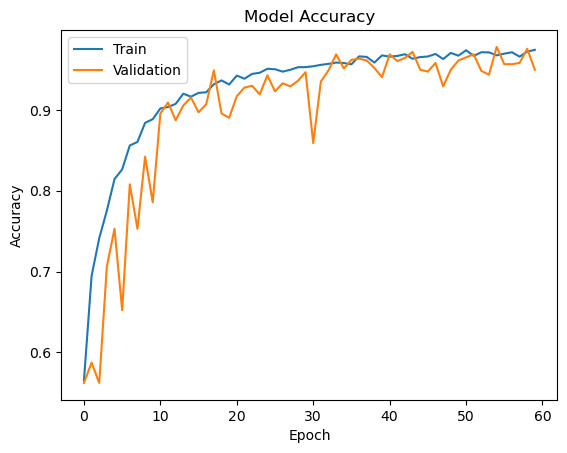

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

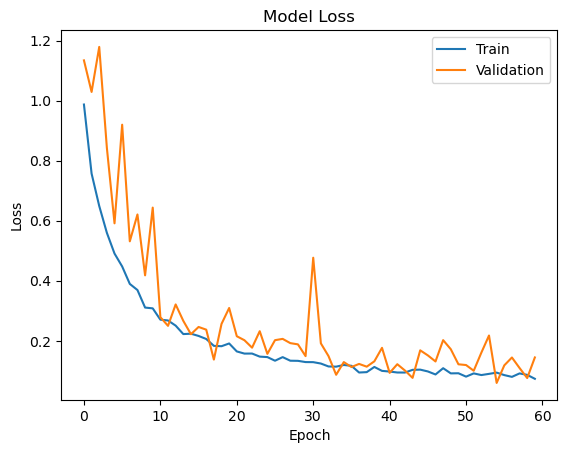

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

In [22]:
loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step - accuracy: 0.9218 - loss: 0.2247
Test Loss: 0.14728106558322906
Test Accuracy: 0.94921875


41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step


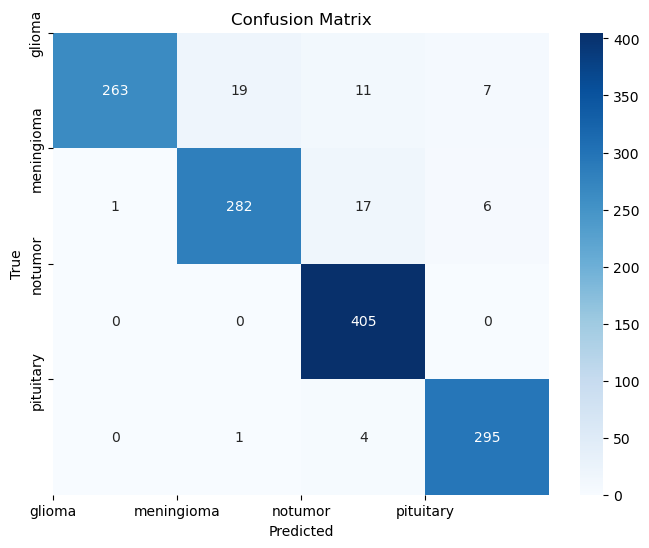

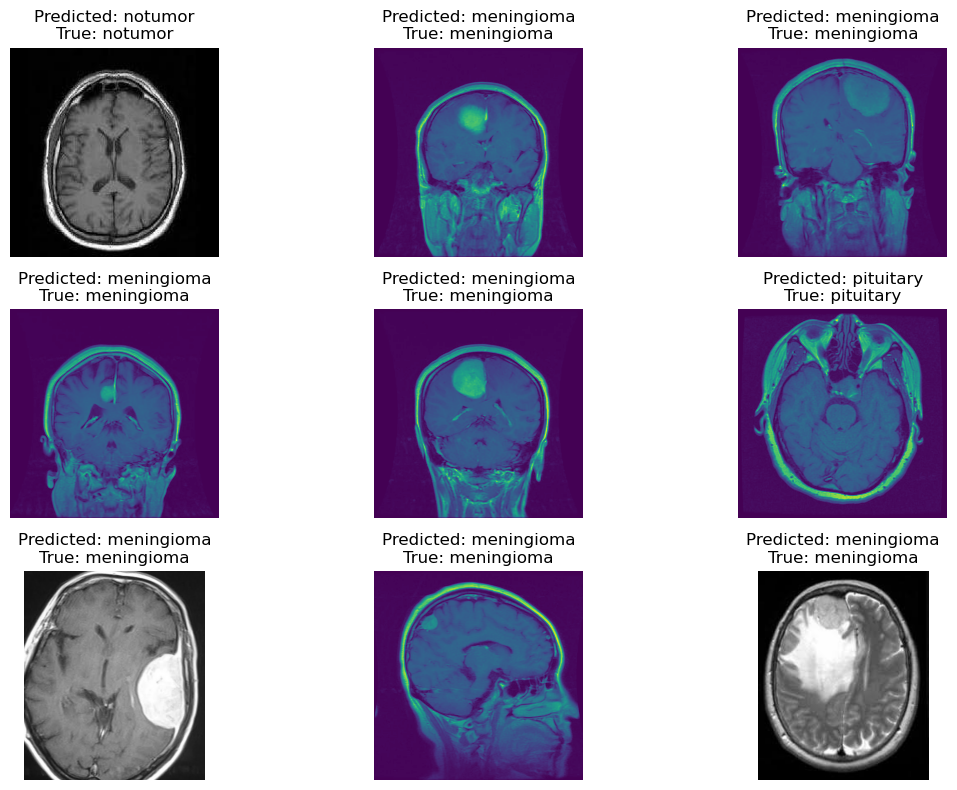

In [23]:
predictions = model.predict(test_generator)
predicted_categories = np.argmax(predictions, axis=1)
true_categories = test_generator.classes

# Create a confusion matrix
confusion_matrix = tf.math.confusion_matrix(true_categories, predicted_categories)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.xticks(ticks=np.arange(len(categories)), labels=categories)
plt.yticks(ticks=np.arange(len(categories)), labels=categories)
plt.show()

# Plot sample images with their predicted and true labels
test_images = test_generator.filenames
sample_indices = np.random.choice(range(len(test_images)), size=9, replace=False)
sample_images = [test_images[i] for i in sample_indices]
sample_predictions = [categories[predicted_categories[i]] for i in sample_indices]
sample_true_labels = [categories[true_categories[i]] for i in sample_indices]

plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

Class: glioma
Precision: 0.9962121212121212
Recall: 0.8766666666666667
F1-Score: 0.9326241134751773

Class: meningioma
Precision: 0.9337748344370861
Recall: 0.9215686274509803
F1-Score: 0.9276315789473684

Class: notumor
Precision: 0.9267734553775744
Recall: 1.0
F1-Score: 0.9619952494061758

Class: pituitary
Precision: 0.9577922077922078
Recall: 0.9833333333333333
F1-Score: 0.9703947368421053



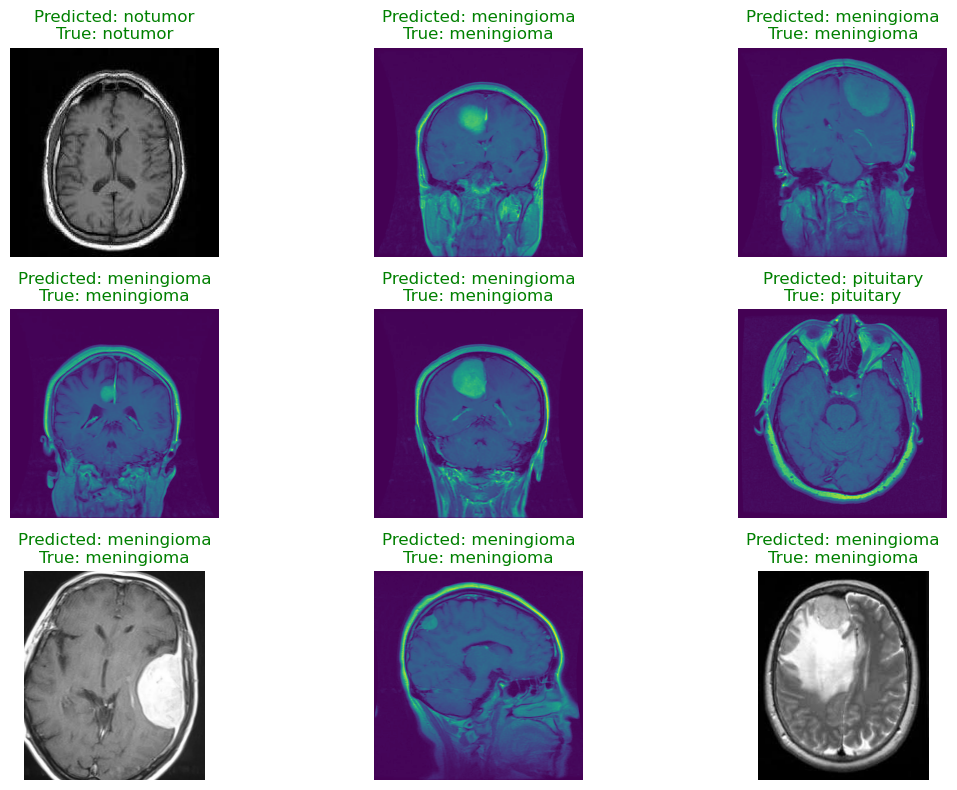

In [24]:
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print precision, recall, and F1-score for each class
for i, category in enumerate(categories):
    print(f"Class: {category}")
    print(f"Precision: {precision[i]}")
    print(f"Recall: {recall[i]}")
    print(f"F1-Score: {f1_score[i]}")
    print()

# Analyze the sample images and their predictions
plt.figure(figsize=(12, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    img = plt.imread(os.path.join(test_dir, sample_images[i]))
    plt.imshow(img)
    if sample_predictions[i] == sample_true_labels[i]:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='green')
    else:
        plt.title(f"Predicted: {sample_predictions[i]}\nTrue: {sample_true_labels[i]}", color='red')
    plt.axis("off")
plt.tight_layout()
plt.show()